![perceptron](https://matt.might.net/images/blog/midjourney-glowing-blue-neural-network-small.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Notes for Introduction to Machine Learning:
Jade Choghari
We will start with the most basic yet fundemantal concept in ML

Perceptron was inspired by neuroscience. It was the first machine learning tool, that could learn and output something inspired by neuroscience.
Just as neurons transmit signals in the brain, perceptrons process input signals, weigh them, and produce outputs that form the basis of AI decision-making. This concept, introduced by Frank Rosenblatt in the 1950s, revolutionized the way machines mimic cognitive functions.

# **What a Dataset always looks like:**

## What a Dataset Looks Like

A dataset is always denoted as $\mathbf{X}$, and could be thought of as a big matrix.

$
\mathbf{X} = \begin{pmatrix}
\mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \cdots & \mathbf{x}_n
\end{pmatrix}
$

Each $\mathbf{x}_i$ is a vector, and that vector is called a datapoint, one point of the data. Each datapoint is $d$-dimensional, which means each data point contains $d$ elements.

$
\mathbf{X} = \begin{pmatrix}
x_{11} & x_{12} & x_{13} & \cdots & x_{1n} \\
x_{21} & x_{22} & x_{23} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{d1} & x_{d2} & x_{d3} & \cdots & x_{dn}
\end{pmatrix}
$

A matrix of a dataset is $n \times d$ (or sometimes $d \times n$), which means each row is a data point, and we have $d$ columns for the features.

You may ask, what is a feature? We will give an example:


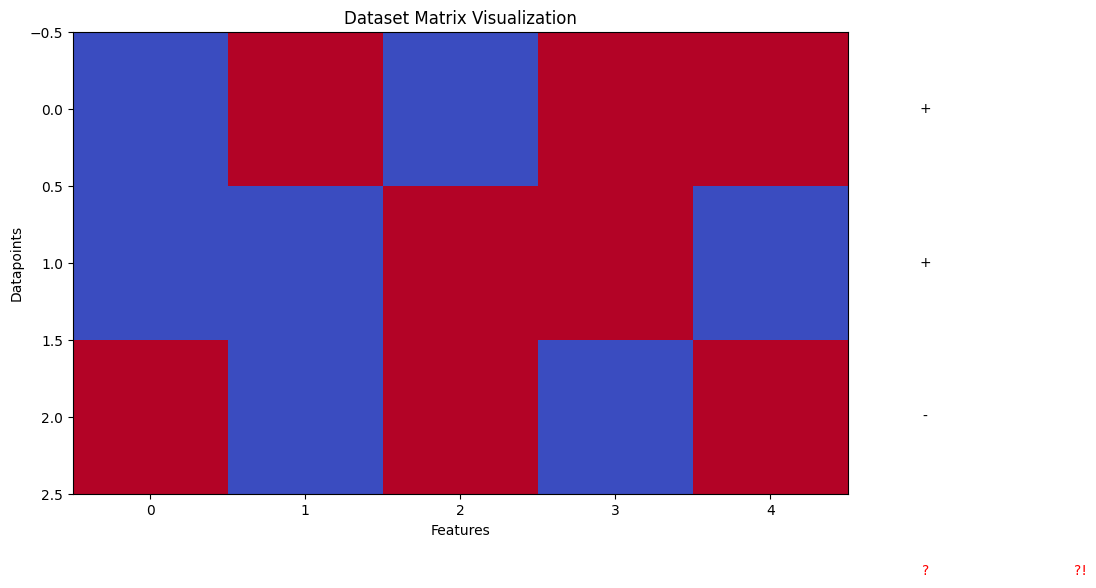

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([
    [0, 1, 0, 1, 1], ## data number 1, and each point inside [0, 1, 0, 1, 1] is a feature of the datapoint, we have here 6 features
    [0, 0, 1, 1, 0], ## data number 2
    [1, 0, 1, 0, 1] ## data number 3
])

# Corresponding labels
y = np.array(['+', '+', '-']) ## each one have a correspondi

# Test samples
x_test = np.array([1, 1])
x_prime_test = np.array([0.9, 1.1])

# Plot the dataset - most people are free to ignore the plotting code below
plt.figure(figsize=(10, 6))
plt.imshow(X, cmap='coolwarm', aspect='auto')

# Annotate the plot
for i in range(len(y)):
    plt.text(X.shape[1], i, y[i], horizontalalignment='center', verticalalignment='center')

plt.text(X.shape[1], len(y), '?', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(X.shape[1] + 1, len(y), '?!', horizontalalignment='center', verticalalignment='center', color='red')

plt.title('Dataset Matrix Visualization')
plt.xlabel('Features')
plt.ylabel('Datapoints')
plt.show()


Each row is a datapoint, and each datapoint contains a corresponding label: '+' or '-'

$\textcolor{red}{\boldsymbol{\cdot}}$: means -1 and $\textcolor{blue}{\boldsymbol{\cdot}}$: means +1;

For example, in a spam classification, we may have some features $d$. In this case, we have 5 features:
- $d1$: Number of words > 250 (True output 1, False output 0)
- $d2$: Number of spam words > 250
- $d3$: The phrase starts with a capital (T or F)
- $d4$: Mail contains suspicious links (T/F)
- $d5$: Recipient is not in receiver contacts ($\textcolor{blue}{\boldsymbol{+1}}$/$\textcolor{red}{\boldsymbol{-1}}$)

Training set: $\mathbf{X}$ in $n \times d$, and labels $y = \{+1, -1\}$

### Batch learning
- Interested in performance on test set $\mathbf{X'}$
- Training set ($\mathbf{X}, y$) is just a means
- Statistical assumption on $\mathbf{X}$ and $\mathbf{X'}$

### Online learning
- Data comes one by one (streaming)
- Need to predict $y$ before knowing its true value
- Interested in making as few mistakes as possible

### Binary Classification Problem
We have Dataset $\mathbf{X}$ in $n \times d$, we need to learn a binary classification rule so that given $\mathbf{x}$, we get,
$h(\mathbf{x}) = y$

How could we learn or create such functions $h$? We will use some linear algebra and weights to tackle this. Memorization works or it doesn't? We do not want our model to memorize this data after all.

The challenge of binary classification lies in two aspects:
- On a test example $(\mathbf{x}, y)$, we actually only have access to $\mathbf{x}$ but not the label $y$. It is our job to predict $y$, hopefully correctly most of the time.
- The test example $\mathbf{x}$ can be (very) different from any of the training examples $\{\mathbf{x}_i : i = 1, \ldots, n\}$. So we cannot expect naive memorization to work.

Essentially, we need a (principled?) way to interpolate from the training set (where labels are known) and hopefully generalize to the test set (where labels need to be predicted). For this to be possible, we need:
- The training set to be “indicative” of what the test set looks like, and/or
- A proper baseline (competitor) to compare against.

We will use the concept of a game, or even life in general. What makes us grow and learn? In a game, what do we do before winning? Mistakes! Exactly.

Repeat the following game:
- Observe instance $\mathbf{x}_i$ (one data point)
- Predict its label $\hat{y}_i$ (in whatever way you like)
- Reveal the true label $y_i$
- Suffer a mistake if $\hat{y}_i \ne y_i$

How many mistakes in the worst-case? (We need to minimize it)

Predict first, reveal next: no peeking into the future.


The algorithm: ![alt text](https://i.sstatic.net/4c4Bs.png)


if w.x = 0, some people consider it a mistake, some no, it depends on the context

Padding:
We sometimes augment the data to include one additional dimension which leaves room for a bias:

x = (x 1) and w = (w b)


The perceptron algorithm is a perfect illustration of the good old wisdom: “If it ain’t broke, don’t fix it.”
Indeed, it maintains the same weight vector (w, b) until when a “mistake” happens, i.e., line 3 in Line 5.
This principle is often used in designing machine learning algorithms, or in life . :)

I recommend (optional). trying to proove this useful and fundematnal theorem: Perceptron Convergence Theorem

The perceptron algo don't output a unique w,b , your friend could be running the same algorithm and have a different answer, they do not care. A unique w, b will be talken in SVMs (next chapter)

Example/Exercise:

In [ ]:
import pandas as pd
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from numba import njit

In [ ]:
# we will be working with the following dataset:
df_X = pd.read_csv('https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/spambase_X.csv')
df_Y = pd.read_csv('https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/spambase_y.csv')

When working wiht a dataset, it is very importnat to know the dimension/shape, n x d, or someitimes transposed d x n

In [ ]:
print(df_X.shape)
print(df_Y.shape)

(56, 4601)
(4600, 1)


It seems the matrix is transposed: each column is nowb a datapoint and each row is a vector. But that's okay, if you feel more comfortable with the n x d (me too), you can just transpose the matrix .T

In [ ]:
# Data dimension dont match
# Ensure data dimensions match
# we often do it in industry, extra checkpoint
if df_X.shape[1] != df_Y.shape[0]:
    df_X = df_X.iloc[:, :df_Y.shape[0]]

In [ ]:
# numpy allows for faster computation, let's
# Convert DataFrame to numpy arrays
X = df_X.to_numpy()
y = df_Y.to_numpy().flatten()


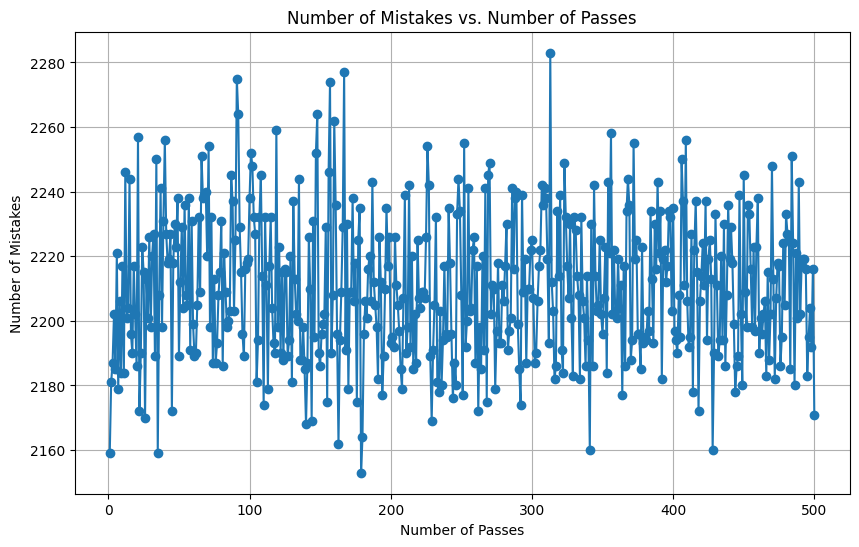

In [ ]:
# main algorithm as discussed in this chapter with plotting
# concatinate
# xi will be sperable
def perceptron(X, y, max_pass=500, d_second=False):
    # Initialize parameters
    if d_second:
      w = np.zeros(X.shape[1])
      b = 0
    else:
      w = np.zeros(X.shape[0])

    b = 0
    mistakes = []

    # Run the perceptron algorithm
    for t in range(max_pass):
        mistake_t = 0

        for i in range(X.shape[1]):
            if y[i] * (np.dot(w, X[:, i]) + b) <= 0:
                w = w + y[i] * X[:, i]
                b = b + y[i]
                mistake_t += 1
        mistakes.append(mistake_t)
    return w, b, mistakes

def plot_mistakes(mistakes):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(mistakes) + 1), mistakes, marker='o')
    plt.xlabel('Number of Passes')
    plt.ylabel('Number of Mistakes')
    plt.title('Number of Mistakes vs. Number of Passes')
    plt.grid(True)
    plt.show()

# Run the perceptron algorithm
w, b, mistakes = perceptron(X, y)

# Plot the number of mistakes
plot_mistakes(mistakes)

This means two things: 1- There is a bug in the algorithm , 2- Dataset is not linearly seperable, could you know which one is it and why?

Let's implement a one-vs-all reduction multiclass perceptron

In [ ]:
activity_X_url = 'https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/activity_X_train.txt'
activity_y_url = 'https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/activity_y_train.txt'
activity_X_test_url = 'https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/activity_X_test.txt'
activity_y_test_url = 'https://cs.uwaterloo.ca/~y328yu/mycourses/480/datasets/activity_y_test.txt'
X_train = pd.read_csv(activity_X_url, delim_whitespace=True, header=None)
y_train = pd.read_csv(activity_y_url, header=None)
X_test = pd.read_csv(activity_X_test_url, delim_whitespace=True, header=None)
y_test = pd.read_csv(activity_y_test_url, header=None)


In [ ]:
# we are dealing with the following dataset X
data = np.loadtxt(activity_X_url)
data

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [ ]:
# the shapes, remeber n x d or d x n, let's see:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


In [ ]:
# This is how we will proceed:

Steps: Train a separate binary classifier for each class: For a dataset with k classes, train k binary classifiers.

Each classifier Ci will be trained to distinguish the samples of class i from the samples of all other classes.

Make predictions: For a given input, each binary classifier will output a score. The class with the highest score will be the final prediction.
![alt text](https://courses.cs.washington.edu/courses/cse415/21sp/assign/a6/1vsAll.png)




In [ ]:
def perceptron(X, y, max_pass):
    num_features = X.shape[1]
    num_dp = X.shape[0]
    w = np.zeros(num_features)
    b = 0

    for _ in range(max_pass):
        for i in range(num_dp):
            x_i = X[i, :]
            y_i = y[i]
            w_dot_xi = np.dot(w, x_i)
            if (y_i * (w_dot_xi + b)) <= 0:
                w += (x_i * y_i)
                b += y_i

    return w, b
# Multiclass perceptron training function using one-vs-all
def multiclass_perceptron_training(X, y, num_classes, max_pass):
    n, d = X.shape
    # we can add debugging, that was mine so i will leave it
    # if n != 7352 and d != 561:
    #   print("Size error")
    #   print(n, d)
    #   raise SystemExit

    # initialize weights and biases for each class
    weights = np.zeros((num_classes, d))
    biases = np.zeros(num_classes)

    for class_idx in range(num_classes):
        # create binary labels for the current class (1 for the current class, -1 for all others)
        # as we said in the notes go back to one vs all explanation if you're lost
        binary_labels = np.where(y == class_idx, 1, -1) # setting the class (one) to 1, vs all (else must be 0) this is the method
        binary_labels_flat = binary_labels.flatten()

        # train binary perceptron for the current class
        w, b = perceptron(X, binary_labels_flat, max_pass)
        if False:
          print('Shape of X is ', X.shape)
          print("shape of weights is :", weights[class_idx, :].shape)
          print("shape of w is", w.shape)
          print("shape of b is", b.shape)
          raise SystemExit
        weights[class_idx, :] = w
        biases[class_idx] = b

    return weights, biases

# predict function
def multiclass_perceptron_predict(X, weights, biases):
    num_classes = weights.shape[0]
    n = X.shape[0]

    # initialize an array to store scores for each class
    scores = np.zeros((num_classes, n))

    for class_idx in range(num_classes):
        scores[class_idx, :] = np.dot(X, weights[class_idx, :]) + biases[class_idx]

    # predict the class with the highest score
    predictions = np.argmax(scores, axis=0)

    return predictions

In [ ]:
# if you're lost wiht the np.where thing, this is how it works
y_train.shape
binary_labels = np.where(y_train == 5, 1, -1)
binary_labels_flat = binary_labels.flatten()
binary_labels_flat

array([ 1,  1,  1, ..., -1, -1, -1])

In [ ]:
# and this is how our labels used to be like:
y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [ ]:
# this is probably the code that took me most amount of time, comparing results,
# it should not be complicated though, here is the code
# convert X_train and y_train to NumPy arrays
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

# train the multiclass perceptron
weights, biases = multiclass_perceptron_training(X_train_array, y_train_array, num_classes=6, max_pass=500)

# make predictions on the training set
train_predictions = multiclass_perceptron_predict(X_train_array, weights, biases)
train_errors = np.sum(train_predictions != y_train_array)
print(f'Training Errors: {train_errors}')

# make predictions on the test set
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()
test_predictions = multiclass_perceptron_predict(X_test_array, weights, biases)
test_errors = np.sum(test_predictions != y_test_array) # basic, just sum the errors and see
print(f'Test Errors: {test_errors}')

Training Errors: 46754727
Test Errors: 7486990


In [ ]:
#We will calculate the accuracy of the perceptron, or the plane we just found:
# Calculate the percentage of True values
incorrect_predictions = (train_predictions != y_train_array)
total_elements = incorrect_predictions.size
true_elements = np.sum(incorrect_predictions)
percentage_true = (true_elements / total_elements) * 100

percentage_true

86.4996855614929

This is not that bad, given the number of epoch and compute we did;

One vs One technnique:

Intuitive: One vs One, is comparing them and create weights for all; so the total matrix W, won't be a vectpr d anymore (or d+1 if you applying padding); but we will have (c 2) vectors w since we are applying it one by one; W in (c 2) x d

In [ ]:
#import additional libraries to take combinations etc..
from itertools import combinations
from collections import Counter

In [ ]:
def ovo_perceptron_training(X, y, num_classes, max_pass):
    classifiers = {}
    for class_pair in combinations(range(num_classes), 2):
        class_1, class_2 = class_pair
        # filter data for the two classes
        filter_mask = (y == class_1) | (y == class_2)
        X_pair = X[filter_mask.flatten(), :]
        y_pair = y[filter_mask]
        # create binary labels
        y_binary = np.where(y_pair == class_1, 1, -1)
        # train the perceptron
        w, b = perceptron(X_pair, y_binary, max_pass)
        classifiers[class_pair] = (w, b)
    return classifiers

def ovo_perceptron_predict(X, classifiers, num_classes):
    votes = np.zeros((X.shape[0], num_classes))
    for (class_1, class_2), (w, b) in classifiers.items():
        predictions = np.sign(np.dot(X, w) + b)
        for i, pred in enumerate(predictions):
            if pred == 1:
                votes[i, class_1] += 1
            else:
                votes[i, class_2] += 1
    # final prediction is the class with the most votes
    final_predictions = np.argmax(votes, axis=1)
    return final_predictions



The technique here is simlar to one vs all, but inttead of assume all class one; we will just do one class at a time; increase weights; then apply for each one weight and do a voting system; to compare highest rated and choose; for example if data xi belonged to class 2, maybe comaring class 2 with class 1 (we chose class 2); CLASS 2 wihth all classes we will choose class 2, but comparing class 6 with all other classes, the number of times we choose 6 will be lesser thant true class 2

In [ ]:
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

classifiers = ovo_perceptron_training(X_train_array, y_train_array, num_classes=6, max_pass=500)
predictions = ovo_perceptron_predict(X_train_array, classifiers, num_classes=6)

In [ ]:
incorrect_predictions = (predictions != y_train_array)
# Calculate the percentage of True values
total_elements = incorrect_predictions.size
true_elements = np.sum(incorrect_predictions)
percentage_true = (true_elements / total_elements) * 100

percentage_true

83.38951390130494

83.3 % is not bad

As you can see, the main goal was to find optimal weights and biases to separate the best dataset possible; other things like voting and scores are tweaks. In fact, you will see a lot of tweaks during your ML journey, don't be surprised by that. We have seen how weights separate, but you may ask how weights separation works or why this algorithm works; we will see this in the next chapter on SVMs.


Additional Material for enthusiatic readers

If you're interested; what we have seen so far are variation from voting to scoring, but the most common way to do is create a MCP, which is a multi class perceptron:
this is the algorithm of it;
![mlp](https://drive.google.com/file/d/1Vc-yue-JIJOq6O7coPCJrFuWJr0c-b8r/view?usp=sharing)



MCP are used in Transformers (in the final layers of LLMs to predict the next token), and in many other applications

In [ ]:
import numpy as np

def multiclass_perceptron(X, y, learning_rate, max_passes):
    """
    This function implements a multi-class perceptron algorithm for classification.

    Args:
        X: A numpy array of shape (n_samples, n_features) containing the training data.
        y: A numpy array of shape (n_samples,) containing the labels (1-6 for activities).
        learning_rate: The learning rate for weight updates.
        max_passes: the maximum number of passes through the training data.

    Returns:
        A numpy array of shape (n_classes, n_features) containing the learned weights.
    """
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))

    weights = np.zeros((n_classes, n_features))

    y_adj = y - 1 # adjust labels to start from 0 (the index started at 1, it must start at 0)
    for _ in range(max_passes):
        for i in range(n_samples):
            # calculate predicted class
            predicted_class = np.argmax(np.dot(weights, X[i]))

            # logic here

            # update weights only for misclassification
            if predicted_class != y_adj[i]:
                weights[y_adj[i]] += learning_rate * X[i]
                weights[predicted_class] -= learning_rate * X[i]

    return weights

def predict(X, weights):
    scores = np.dot(X, weights.T)
    predictions = np.argmax(scores, axis=1)
    return predictions + 1  # adjust predictions to original class labels

In [ ]:
def multiclass(X, y, num_classes, num_epochs):
    # Initialize weight vectors
    W = np.zeros((num_classes, X.shape[1]))

    for epoch in range(num_epochs):
        for i in range(len(X)):
            xi = X[i]
            yi = y[i] - 1  # Adjusting for zero-indexed labels

            # Predict the class
            scores = np.dot(W, xi)
            y_hat = np.argmax(scores)
            # Update weights if prediction is incorrect
            if y_hat != yi:
                W[yi] = W[yi] + xi
                W[y_hat] = W[y_hat] - xi


    return W

# Example usage:
# X is the input matrix (n_samples x n_features)
# y is the target vector (n_samples,)
# num_classes is the number of distinct classes
# num_epochs is the number of iterations over the training set
W = multiclass(X_train_array, y_train_array, num_classes=6, num_epochs=500)
y_train_pred = np.argmax(np.dot(X_train, W.T), axis=1)

In [ ]:
print('Shape of W:', W.shape)

Shape of W: (6, 561)


In [ ]:
# as you can see we have (c 2) weights for 6 features

In [ ]:
# use the trained weights for prediction on new data
def predict(X, weights):
  scores = np.dot(X, weights.T)
  predicted_class = np.argmax(scores, axis=1) + 1
  return predicted_class + 1

# predict activity for a new data point x
predicted_activity = predict(X_train_array, weights)

In [ ]:
import matplotlib.pyplot as plt

# function to apply the step function
def step_fn(x):
    return np.where(x >= 0, 1.0, 0.0).reshape(-1, 1)

# function to calculate training errors
def training_errors(epoch, errors, X_train, y_train, w):
    n = X_train.shape[0]
    for i in range(n):
        xi = X_train[i].reshape(-1, 1)
        v = np.matmul(w, xi)
        prediction = v.argmax(axis=0)
        actual = y_train[i] - 1  # Adjust for zero-indexed labels
        if prediction != actual:
            errors[epoch] += 1
    return errors[epoch]

# function to update weights
def update_weight(w, X_train, y_train, learning_rate):
    n = X_train.shape[0]
    for i in range(n):
        xi = X_train[i].reshape(-1, 1)
        y = step_fn(np.matmul(w, xi))
        label = np.zeros((6, 1))
        label[y_train[i] - 1] = 1  # Adjust for zero-indexed labels
        difference = label - y
        xit = xi.T
        update = learning_rate * np.matmul(difference, xit)
        w += update

# function to train the perceptron
def learning_weights(X_train, y_train, threshold, learning_rate):
    n, d = X_train.shape
    w = np.zeros((6, d))
    errors = []
    epoch = 0

    while epoch < 100:
        errors.append(0)
        errors[epoch] = training_errors(epoch, errors, X_train, y_train, w)
        update_weight(w, X_train, y_train, learning_rate)
        epoch += 1
        if errors[epoch-1] / n <= threshold:
            break

    return w, errors

# function to plot errors vs epochs
def plot_graph(errors):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.plot(range(len(errors)), errors, c='green')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

# function to find test errors
def find_errors(X_test, y_test, w):
    test_errors = 0
    for i in range(len(X_test)):
        xi = X_test[i].reshape(-1, 1)
        v = np.matmul(w, xi)
        prediction = v.argmax(axis=0)
        actual = y_test[i] - 1  # Adjust for zero-indexed labels
        if prediction != actual:
            test_errors += 1
    print("Number of errors in test data:", test_errors)
    print("Percentage of test errors:", test_errors * 100 / len(X_test))


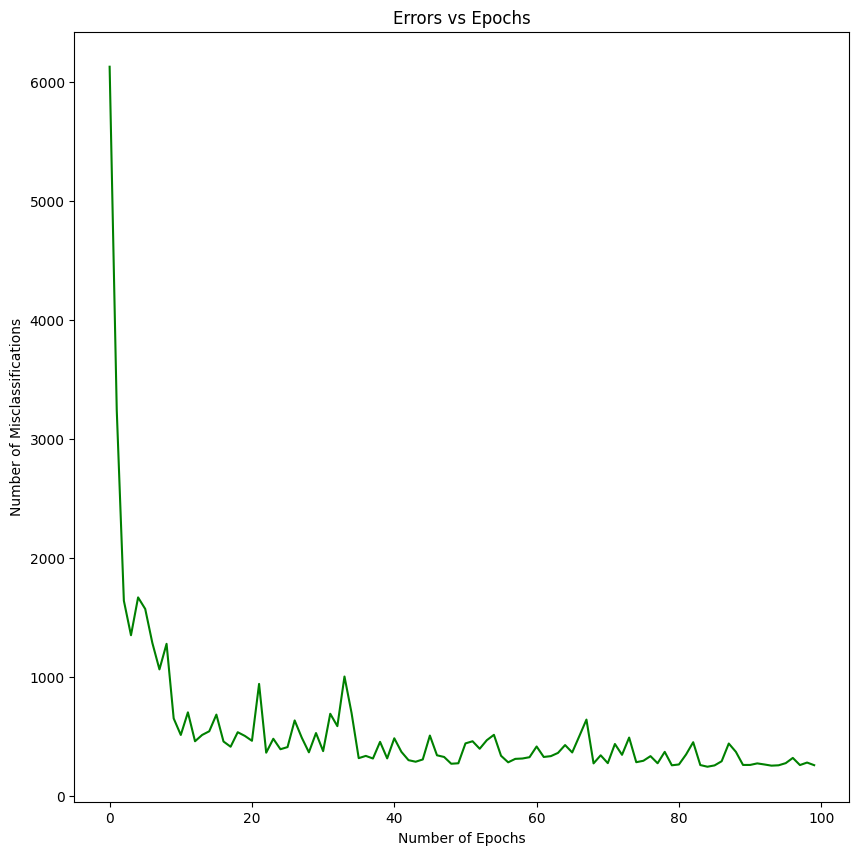

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# Example usage:
# Assuming X_train is the training data matrix (n_samples x n_features)
# y_train is the training labels vector (n_samples,) with class labels from 1 to 6
# X_test is the test data matrix
# y_test is the test labels vector

n_samples = 1000
n_features = 784  # example for 28x28 images flattened
# parameters
threshold = 0.01
learning_rate = 0.1

# train the perceptron
w, errors = learning_weights(X_train_array, y_train_array, threshold, learning_rate)

# plot the training errors
plot_graph(errors)

# evaluate on test set
find_errors(X_test, y_test, w)

In [ ]:
# Function to find test errors
def find_errors(X_test, y_test, w):
    test_errors = 0
    for i in range(len(X_test)):
        xi = X_test[i].reshape(-1, 1)
        v = np.matmul(w, xi)
        prediction = v.argmax(axis=0)
        actual = y_test[i] - 1  # Adjust for zero-indexed labels
        if prediction != actual:
            test_errors += 1
    print("Number of errors in test data:", test_errors)
    print("Percentage of test errors:", test_errors * 100 / len(X_test))

In [ ]:

# use the trained weights for prediction on new data
def predict(X, weights):
  scores = np.dot(X, weights.T)
  predicted_class = np.argmax(scores, axis=1)
  return predicted_class

# predict activity for a new data point x
predicted_activity = predict(X_train_array, w)
# correct = predicted_activity == y_test_array
# incorrect = predicted_activity != y_test_array
# print('The correct sum', correct.sum())
# print('The incorrect sum', incorrect.sum())

In [ ]:
find_errors(X_test_array, y_test_array, W)

Number of errors in test data: 141
Percentage of test errors: 4.784526637258229
